# PROJEKT

## Bludiště

In [1019]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import deque
import random

In [1020]:
def generovani_bludiste_sablona(matice_bludiste):
    radky, sloupce = matice_bludiste.shape
    start = (0, 0)
    konec = (radky - 1, sloupce - 1)

    # Nyní přidáme náhodné překážky
    for i in range(radky):
        for j in range(sloupce):
            if matice_bludiste[i, j] == 0:
                matice_bludiste[i, j] = 1
            if random.random() < 0.3:
                matice_bludiste[i, j] = 1
            else:
                matice_bludiste[i, j] = 0
    
    # Vytvoříme průchozí cestu od startu k cíli            
    aktualni = start
    matice_bludiste[aktualni] = 0

    while aktualni != konec:
        sousedi = []
        if aktualni[0] + 1 < radky:
            sousedi.append((aktualni[0] + 1, aktualni[1]))
        if aktualni[1] + 1 < sloupce:
            sousedi.append((aktualni[0], aktualni[1] + 1))
        
        dalsi = random.choice(sousedi)
        matice_bludiste[dalsi] = 0
        aktualni = dalsi
    
    # Ujistíme se, že start a end jsou průchozí
    matice_bludiste[start] = 0
    matice_bludiste[konec] = 0
    
    return matice_bludiste

In [1021]:
def generovani_bludiste(radky, sloupce):
    bludiste = np.ones((radky, sloupce), dtype=int)  # Začínáme s neprůchozím bludištěm (vše 1)
    start = (0, 0)
    konec = (radky - 1, sloupce - 1)
    
    # Vytvoříme průchozí cestu od startu k cíli
    aktualni = start
    bludiste[aktualni] = 0

    while aktualni != konec:
        sousedi = []
        if aktualni[0] + 1 < radky:
            sousedi.append((aktualni[0] + 1, aktualni[1]))
        if aktualni[1] + 1 < sloupce:
            sousedi.append((aktualni[0], aktualni[1] + 1))
        
        dalsi = random.choice(sousedi)
        bludiste[dalsi] = 0
        aktualni = dalsi

    # Nyní přidáme náhodné překážky, zachováme však průchozí cestu
    for i in range(radky):
        for j in range(sloupce):
            if bludiste[i, j] == 0:
                continue
            if random.random() < 0.3:
                bludiste[i, j] = 1
            else:
                bludiste[i, j] = 0
    
    # Ujistíme se, že start a end jsou průchozí
    bludiste[start] = 0
    bludiste[konec] = 0
    
    return bludiste

In [1022]:
def nacitani_csv(nazev):
    with open(nazev, 'r') as csvsoubor:
        soubor = csv.reader(csvsoubor)
        matice_bludiste = []
        for radek in soubor:
            matice_bludiste.append([1 if cell == '1' else 0 for cell in radek])
    return np.array(matice_bludiste)

In [1023]:
def incidencni_matice(matice_bludiste):
    radky, sloupce = matice_bludiste.shape
    vrcholy = []
    hrany = []

    # Najít všechny průchozí vrcholy
    for i in range(radky):
        for j in range(sloupce):
            if matice_bludiste[i, j] == 0:  # 0 znamená průchozí buňka
                vrcholy.append((i, j))
                # Přidat hrany pro sousední vrcholy
                if i < radky - 1 and matice_bludiste[i + 1, j] == 0:  # Dolní soused
                    hrany.append(((i, j), (i + 1, j)))
                if j < sloupce - 1 and matice_bludiste[i, j + 1] == 0:  # Pravý soused
                    hrany.append(((i, j), (i, j + 1)))

    vrchol_idx = {vrchol: idx for idx, vrchol in enumerate(vrcholy)}
    incidencni_matice = np.zeros((len(vrcholy), len(hrany)), dtype=int)

    for hrana_idx, (v1, v2) in enumerate(hrany):
        incidencni_matice[vrchol_idx[v1], hrana_idx] = 1
        incidencni_matice[vrchol_idx[v2], hrana_idx] = 1

    return incidencni_matice, vrcholy, vrchol_idx 

In [1024]:
def bfs_nejkratsi_cesta(incidencni_matice, vrcholy, vrcholy_idx, start, konec):
    pocet_vrcholu = incidencni_matice.shape[0]
    hrany_pocet = incidencni_matice.shape[1]
    start_idx = vrcholy_idx[start]
    konec_idx = vrcholy_idx[konec]
    
    queue = deque([start_idx])
    vzdalenosti = {start_idx: [start]}
    navstiveno = set()
    navstiveno.add(start_idx)
    
    while queue:
        aktualni_idx = queue.popleft()
        if aktualni_idx == konec_idx:
            return vzdalenosti[aktualni_idx]
        
        for hrana_idx in range(hrany_pocet):
            if incidencni_matice[aktualni_idx, hrana_idx] == 1:
                for vrchol_idx in range(pocet_vrcholu):
                    if vrchol_idx != aktualni_idx and incidencni_matice[vrchol_idx, hrana_idx] == 1:
                        if vrchol_idx not in navstiveno:
                            navstiveno.add(vrchol_idx)
                            queue.append(vrchol_idx)
                            vzdalenosti[vrchol_idx] = vzdalenosti[aktualni_idx] + [vrcholy[vrchol_idx]]
    
    return None

In [1025]:
def mark_path_in_maze(matice_bludiste, cesta):
    for (i, j) in cesta:
        matice_bludiste[i, j] = 2
    return matice_bludiste

In [1026]:
def vykresleni_grafu(matice_bludiste):
    cmap = ListedColormap(['white', 'black', 'red'])
    
    fig = plt.figure(figsize=(5, 5))
    plt.imshow(matice_bludiste, cmap=cmap, interpolation='nearest')
    plt.show()

In [1027]:
empty = np.zeros((20, 20), dtype = int)

In [1028]:
slalom = np.ones((20, 20), dtype = int)
slalom[0, :] = 0
slalom[0:6, 19] = 0
slalom[5, :] = 0
slalom[5:16, 0] = 0
slalom[15, :] = 0
slalom[15:20, 19] = 0

In [1029]:
nazev = 'maze_5.csv'
matice_bludiste = nacitani_csv(nazev)
#matice_bludiste = generovani_bludiste_sablona(empty)
#matice_bludiste = generovani_bludiste(20, 20)


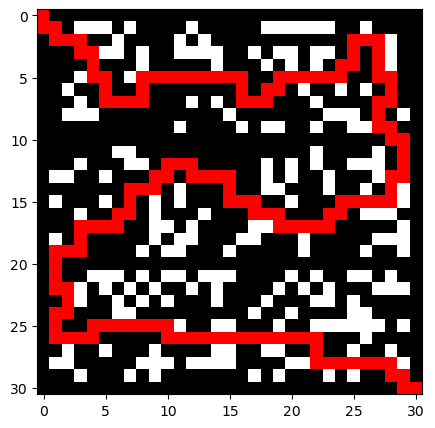

In [1030]:
m, n = matice_bludiste.shape
start = (0, 0)
konec = (m - 1, n - 1)

incidencni_matice, vrcholy, vrchol_idx = incidencni_matice(matice_bludiste)

cesta = bfs_nejkratsi_cesta(incidencni_matice, vrcholy, vrchol_idx, start, konec)

vysledna_cesta = mark_path_in_maze(matice_bludiste, cesta)
vykresleni_grafu(vysledna_cesta)